In [1]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import warnings
import scipy as sc

# Data import to get r and t
data = np.genfromtxt("../Example Data/real_eyemovement_001_1kHz.csv", delimiter=',')
df = pd.DataFrame(data)
data_interpolate = df.interpolate(limit_direction='both')
data1 = pd.DataFrame.to_numpy(data_interpolate)
data2 = data1.transpose()

t = (data2[0])
x = (data2[2])
y = (data2[1])
r = np.sqrt(x**2+y**2)            # Radial component of x and y data

# Getting x and y data amd inserting r into data frame
eye_movement_data = pd.read_csv("../Example Data/real_eyemovement_001_1kHz.csv", usecols=[0,1,2], header=None, index_col=0)
eye_movement_data = eye_movement_data.interpolate(limit_direction='both')
eye_movement_data['Time'] = pd.to_datetime(t, unit='s', dayfirst=True)
eye_movement_data['r'] = r
eye_movement_data = eye_movement_data.set_index('Time')
eye_movement_data.columns = ['y','x', 'r']

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

Text(0, 0.5, 'Horizontal eye position')

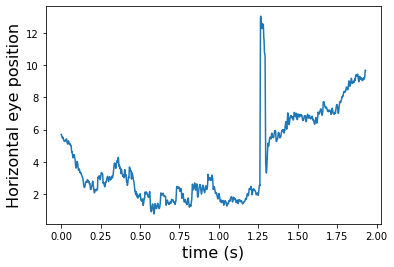

In [2]:
plt.plot(t, x)
plt.xlabel('time (s)', fontsize=16)
plt.ylabel('Horizontal eye position', fontsize=16)

In [3]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [4]:
### Function to calculate percentage of false nearest neighbours for a range of embedding dimensions 

def false_nearest_neighbors(data,delay,embedding_dimension):

    embedded_data = takens_embedding(data, delay, embedding_dimension);

    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(embedded_data.transpose())
    distances, indices = nbrs.kneighbors(embedded_data.transpose())

    epsilon = np.std(distances.flatten())
    nFalseNN = 0

    for i in range(0, len(data)-delay*(embedding_dimension+1)):
        if (0 < distances[i, 1]) and (distances[i, 1] < epsilon) and ( (abs(data[i+embedding_dimension*delay] - data[indices[i,1]+embedding_dimension*delay]) / distances[i,1]) > 10):
            nFalseNN += 1;
    return nFalseNN

[0.8700155359917141, 0.31020196789228377, 0.05282237182806836, 0.006732263076126359, 0.004142931123770067, 0.0036250647332988087]


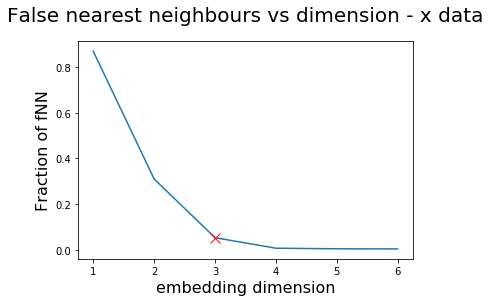

In [5]:
# False Nearest Neighbours for x data 

x_data = eye_movement_data.iloc[:,1]

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(x_data,48,i) / len(x_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16);
plt.ylabel('Fraction of fNN', fontsize=16);
plt.title('False nearest neighbours vs dimension - x data', fontsize=20, pad=20)

print(nFNN)

[0.8508544795442776, 0.3153806317969964, 0.061108234075608496, 0.0031071983428275505, 0.0010357327809425167, 0.0010357327809425167]


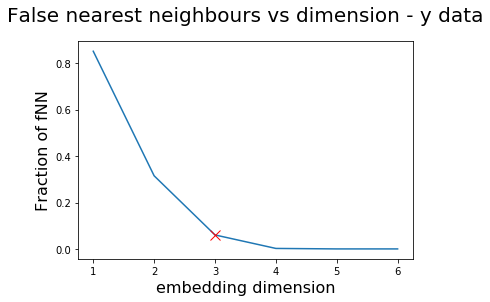

In [6]:
# False Nearest Neighbours for y data 

y_data = eye_movement_data.iloc[:,0]

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(y_data,48,i) / len(y_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16)
plt.ylabel('Fraction of fNN', fontsize=16)
plt.title('False nearest neighbours vs dimension - y data', fontsize=20, pad=20)

print(nFNN)

[0.877783531848783, 0.2972553081305023, 0.05800103573278094, 0.005696530295183843, 0.002589331952356292, 0.002589331952356292]


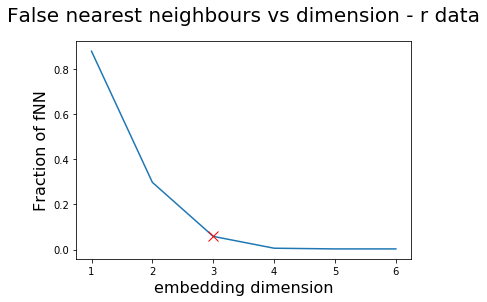

In [7]:
# False Nearest Neighbours for r data 

r_data = eye_movement_data.iloc[:,2]

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(r_data,48,i) / len(r_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16)
plt.ylabel('Fraction of fNN', fontsize=16)
plt.title('False nearest neighbours vs dimension - r data', fontsize=20, pad=20)

print(nFNN)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

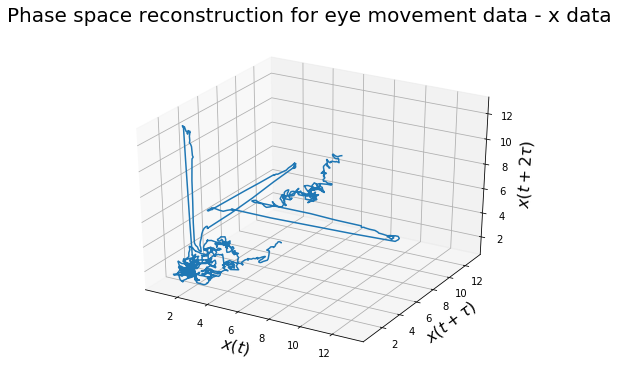

In [8]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 55, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)


Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - y data')

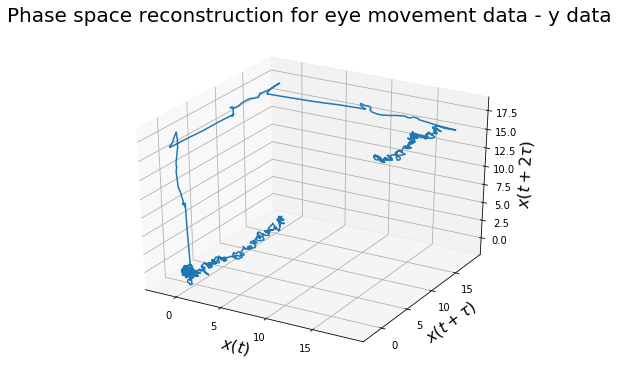

In [9]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 48, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - y data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - r data')

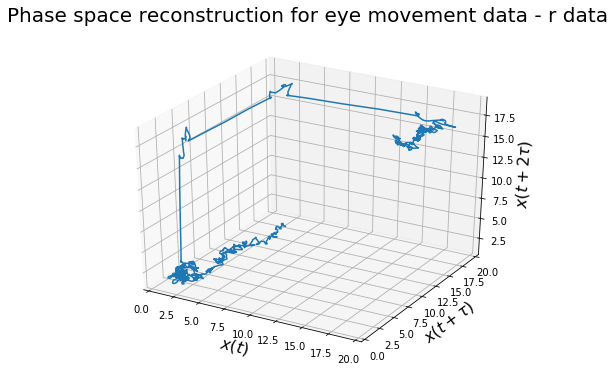

In [10]:
### Performing phase space reconstruction for x data 

embedded_r_final = takens_embedding(r_data, 48, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - r data', fontsize=20, pad=40)

(-0.05, 0.05)

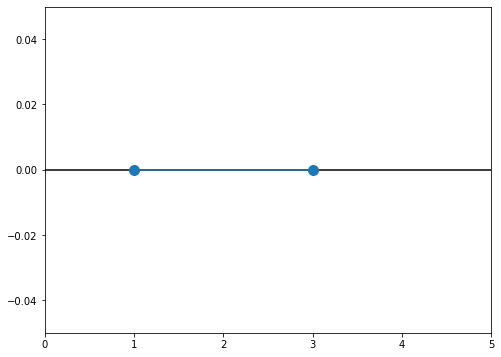

In [11]:
x0 = [1,3]
y0 = [0,0]

plt.figure(figsize=(8,6))
plt.axhline(0, color='black')
plt.plot(x0, y0, marker='o', markersize=10)
plt.xlim(0,5)
plt.ylim(0,0)


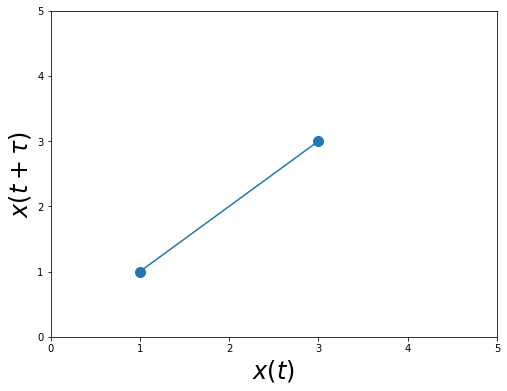

In [12]:
x1 = [1,3]
y1 = [1,3]

plt.figure(figsize=(8,6))
plt.plot(x1,y1, marker='o', markersize=10)
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('$x(t)$', fontsize=24)
plt.ylabel('$x(t+\u03C4)$', fontsize=24)
plt.show()

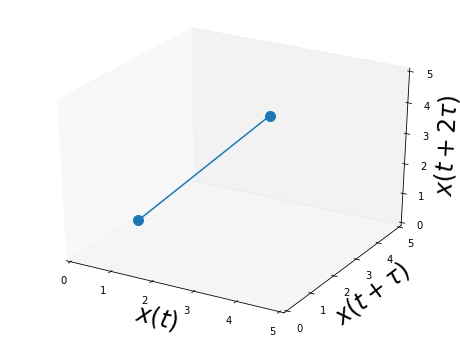

In [13]:
x2 = [1,3]
y2 = [1,3]
z2 = [1,4]

fig1 = plt.figure()
fig1.set_size_inches(8,6)
ax1 = plt.axes(projection='3d')
ax1.plot3D(x2, y2, z2, marker='o', markersize=10)
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.set_zlim(0,5)
ax1.set_xlabel('$x(t)$', fontsize=24)
ax1.set_ylabel('$x(t+\u03C4)$', fontsize=24)
ax1.set_zlabel('$x(t+2\u03C4)$', fontsize=24)
ax1.grid(False)